# 1.1 Advertising Dataset

In [2]:
!gdown --id 1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd

/opt/anaconda3/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd
To: /home/hungtech/AI2025/02_Linear-Regression/advertising.csv
100%|███████████████████████████████████████| 4.06k/4.06k [00:00<00:00, 263kB/s]


In [ ]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

file_path = './advertising.csv'
data = genfromtxt(file_path, delimiter=',', skip_header=1)

N = data.shape[0]

# Tách feature và label
X = data[:,:3] #Indexing and Slicing bắt đầu từ cột đầu kết thúc 
y = data[:,3]


# khi các feature có các range giá trị khác nhau
# chúng ta cần normalize các feature để đưa về cùng range
maxi = np.max(X)
print(maxi)
mini = np.min(X)
print(mini)
avg = np.mean(X)
print(avg)
X = (X-avg) / (maxi-mini)

print(X)

296.4
0.0
66.95349999999999
[[ 5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [-7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [-1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [-1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [-3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [-1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [-2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [-1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 4.62707490e-01 -1.14890351e-01 -7.06933198e-02]
 [ 4.33355263e-01 -6.49578273e-02 -4.74139676e-02]
 [ 2.85593792e-03 -1.02407220e-01  1.58726383e-01]
 [ 7.23503711e-01 -9.22857625e-02 -3.76298920e-02]
 [ 7.57928475e-03 -1.56725709e-01 -1.64148111e-01]
 [ 

In [7]:
# Compute output yhat
def f(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b


def compute_loss(y, yhat):
    return (yhat - y)**2


# Compute gradient for Wi and b
def compute_gradient(y, yhat, var=None):
    if var:
        grad = 2*var*(yhat-y)
    else:
        grad = 2*(yhat-y)
    return grad


def update_wi(wi, lr, dl_dwi):
    wi = wi - lr*dl_dwi
    return wi 

def update_b(b, lr, dl_db):
    b = b - lr*dl_db
    return b    

In [8]:
def implement_linear_regression(X, y, epoch_max = 50, eta = 0.01):
    ########## Các bạn code tại đây ################
    # khởi tạo giá trị tham số
    w1 = np.random.randn()
    w2 = np.random.randn()
    w3 = np.random.randn()
    b = np.random.randn()

    losses = []

    for epoch in range(epoch_max):
        for i in range(N):
            # lấy ngẫu nhiên 1 sample
            print(i)
            x1, x2, x3 = X[i]
            yi = y[i]

            # tính output 
            yhati = f(x1, x2, x3, w1, w2, w3, b)
            print(yhati)

            # tính loss li
            li = compute_loss(yi, yhati)

            # tính gradient w1, w2, w3, b
            dli_dw1 = compute_gradient( yi, yhati, var=x1)
            dli_dw2 = compute_gradient( yi, yhati, var=x2)
            dli_dw3 = compute_gradient( yi, yhati, var=x3)
            dli_db  = compute_gradient( yi, yhati)


            # update giá trị theta
            w1 = w1 - eta*dli_dw1
            w2 = w2 - eta*dli_dw2
            w3 = w3 - eta*dli_dw3
            b  = b - eta*dli_db

            # logging
            losses.append(li)    
    return (w1, w2, w3, b), losses
    ###############################################

In [9]:
X[1:10]

array([[-0.07575405, -0.09329791, -0.07372976],
       [-0.16785931, -0.0710307 ,  0.00791667],
       [ 0.2852446 , -0.08655027, -0.02852058],
       [ 0.3840975 , -0.18945175, -0.02885796],
       [-0.19653677, -0.06090924,  0.02714744],
       [-0.0318944 , -0.11522773, -0.14660425],
       [ 0.17964406, -0.15976215, -0.1867527 ],
       [-0.19687416, -0.21880398, -0.22251518],
       [ 0.44820007, -0.21711707, -0.15436404]])

In [10]:
parameters, losses = implement_linear_regression(X, y, epoch_max = 50, eta = 0.001)

0
-0.39995906455008545
1
-0.5813246325710952
2
-0.7110044922762296
3
-0.4113534049627471
4
-0.15353983623281053
5
-0.6661147913886074
6
-0.3259719594155992
7
-0.08582720768564833
8
-0.11424405953920036
9
0.15625793708662317
10
-0.06308231352834781
11
0.176449438974292
12
-0.3699484339355574
13
0.11651622783036297
14
0.07257768833732742
15
-0.003839641654766024
16
-0.31573222082007735
17
0.27827593465528344
18
0.14689609831002126
19
0.3066314763586707
20
0.35752092049164785
21
0.6678315995102466
22
0.08086252351427689
23
0.6272048157085631
24
0.35724862706124677
25
0.8786054149211675
26
0.5161998925506209
27
0.8195013060128529
28
0.8339818816517339
29
0.4495205267669846
30
0.9442712997138415
31
0.6216750074726675
32
0.7286906084907803
33
1.1808886033898176
34
0.8622193969872158
35
1.3941497461751398
36
1.1494924286212285
37
0.4953059224344439
38
0.607466360586487
39
1.1054071049321625
40
1.180021783708348
41
1.0486962634682382
42
1.6027186490080296
43
1.4284509828448666
44
0.72082428790

(14.015063633781672, -1.5509490583891248, -1.081242396236614, 10.993948839173644)
[506.2481579064296, 120.5894906859127, 161.5696352026665, 285.99387398754504, 325.9303006184449, 61.87576191130264, 147.0391959605334, 176.5132045924802, 24.14979467671632, 238.5091689057999, 160.35365367919445, 296.65069392820897, 91.5839130281856, 184.51103138879586, 358.247315364026, 501.93203068898157, 164.24299235576592, 581.8575718846304, 124.39172664189223, 204.3003837526207, 311.25706807088983, 283.3218930624458, 30.46087848434919, 394.92798843679697, 87.28700321654892, 259.8993633678091, 209.78046555255065, 403.22642779921944, 326.38101065248776, 101.01213764187818, 418.4368366597109, 127.20061463706666, 155.53355793874607, 263.0595744956503, 121.83260064024526, 269.1519225509253, 588.087117469499, 201.77333383722598, 90.10819489539713, 415.93941935555154, 237.77572819090912, 257.6443516423986, 364.7061549989457, 271.3119270245443, 60.51557475963492, 219.68786588394187, 90.23628216533068, 472.250

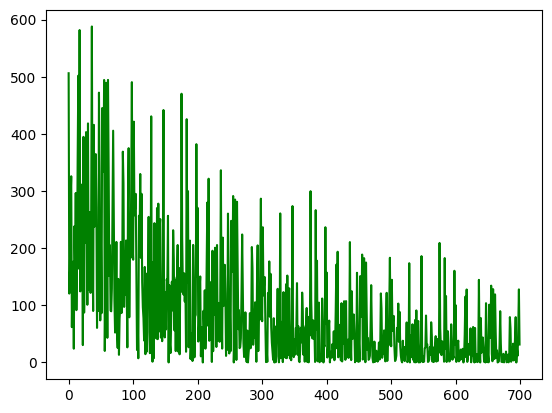

In [11]:
# in loss cho 700 sample đầu
print(parameters)
print(losses)
x_axis = list(range(700))
plt.plot(x_axis, losses[:700], color="g")
plt.show()